In [18]:

!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1cb895a6282b4fc77a91b003a3520ce006eb7188b56cb1ff67eba0af134c1e14
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [19]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CryptoHourlyData.csv", encoding="utf-8")  # Adjust encoding if needed

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575057 entries, 0 to 575056
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      575057 non-null  int64  
 1   Date    575057 non-null  object 
 2   Time    575057 non-null  object 
 3   Open    575057 non-null  float64
 4   High    575057 non-null  float64
 5   Low     575057 non-null  float64
 6   Close   575057 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.7+ MB


,ID,Date,Time,Open,High,Low,Close
0,1,2023-09-10,00:00:00,56.27,56.29,56.16,56.18
1,1,2023-09-09,23:00:00,56.27,56.28,56.16,56.26
2,1,2023-09-09,22:00:00,56.14,56.28,56.12,56.26
3,1,2023-09-09,21:00:00,56.38,56.38,56.07,56.13
4,1,2023-09-09,20:00:00,56.20,56.33,56.19,56.31


In [22]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Make sure the index is a real DatetimeIndex
df.index = pd.to_datetime(df.index)

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

abnormal_periods = [
    ("2017-12-01", "2018-02-01"),
    ("2018-11-01", "2018-12-31"),
    ("2020-03-01", "2020-04-15"),
    ("2022-11-01", "2022-12-15"),
]

# Filter to keep only abnormal periods
abnormal_df = pd.DataFrame()

# Drop rows with NaN (since indicators like SMA_30 need at least 30 rows)
abnormal_df.dropna(inplace=True)

for start, end in abnormal_periods:
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    mask = (df.index >= start_dt) & (df.index <= end_dt)
    abnormal_df = pd.concat([abnormal_df, df[mask]])

# Reset index if needed
abnormal_df = abnormal_df.sort_index()

import ta
# Assuming abnormal_df is your DataFrame
abnormal_df["SMA_10"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.trend.sma_indicator(x, window=10))
abnormal_df["SMA_30"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.trend.sma_indicator(x, window=30))
abnormal_df["RSI"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.momentum.rsi(x, window=14))
abnormal_df["MACD"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.trend.macd(x))
abnormal_df["BB_High"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.volatility.bollinger_hband(x, window=20))
abnormal_df["BB_Low"] = abnormal_df.groupby("ID")["Close"].transform(lambda x: ta.volatility.bollinger_lband(x, window=20))

abnormal_df.head()

,ID,Date,Time,Open,High,Low,Close,Target,SMA_10,SMA_30,RSI,MACD,BB_High,BB_Low
DateTime,,,,,,,,,,,,,,
2017-12-01 00:00:00,2,2017-12-01,00:00:00,9619.68,9766.85,9586.97,9664.23,1,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 01:00:00,2,2017-12-01,01:00:00,9664.99,9893.07,9654.47,9847.61,0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 02:00:00,2,2017-12-01,02:00:00,9874.80,9874.80,9428.71,9428.71,1,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 03:00:00,2,2017-12-01,03:00:00,9462.59,9738.11,9462.59,9682.70,0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 04:00:00,2,2017-12-01,04:00:00,9677.27,9934.97,9657.87,9810.78,0,NaN,NaN,NaN,NaN,NaN,NaN



Training for Coin ID: 2
Train accuracy: 1.0000
Test accuracy: 0.6358


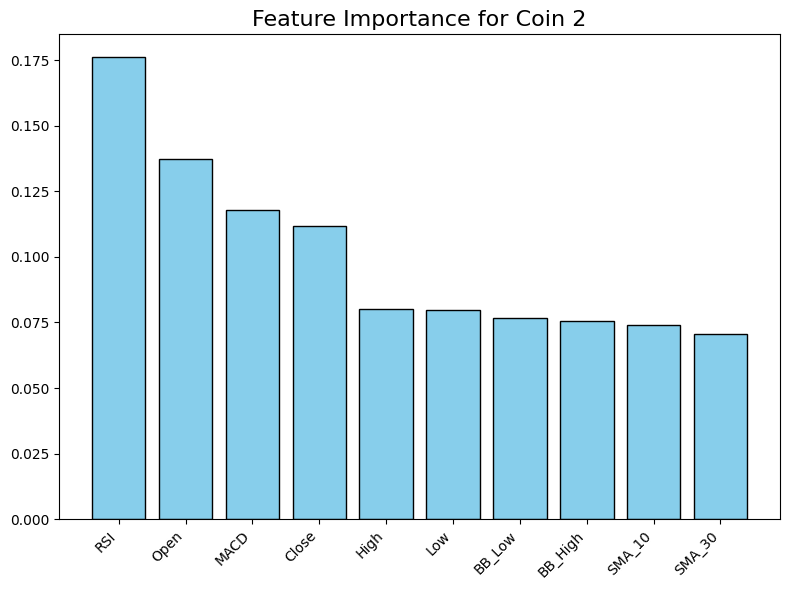


Training for Coin ID: 14
Train accuracy: 1.0000
Test accuracy: 0.7728


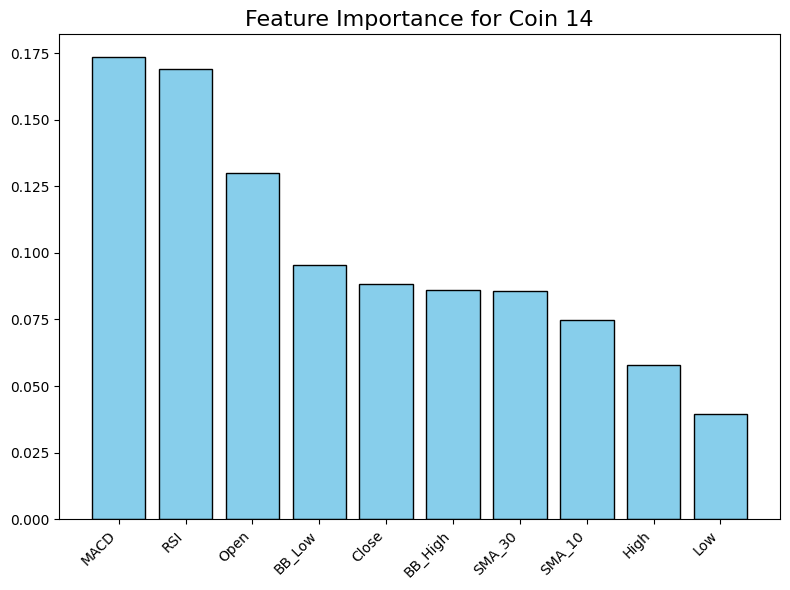


Training for Coin ID: 3
Train accuracy: 1.0000
Test accuracy: 0.6415


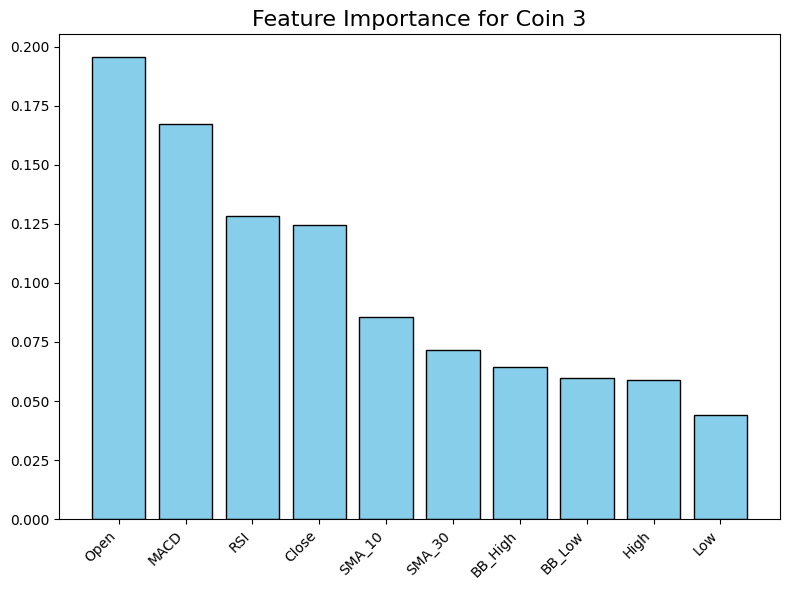


Training for Coin ID: 6
Train accuracy: 1.0000
Test accuracy: 0.6034


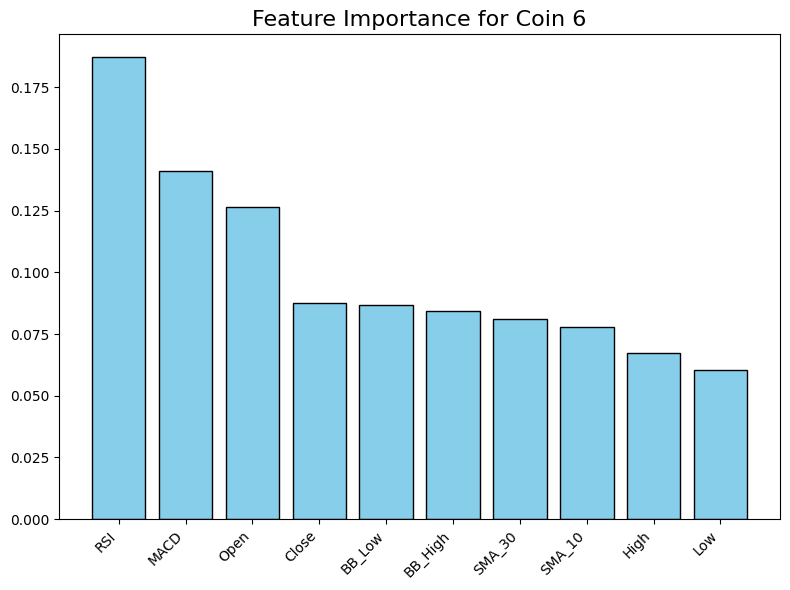


Training for Coin ID: 8
Train accuracy: 1.0000
Test accuracy: 0.6164


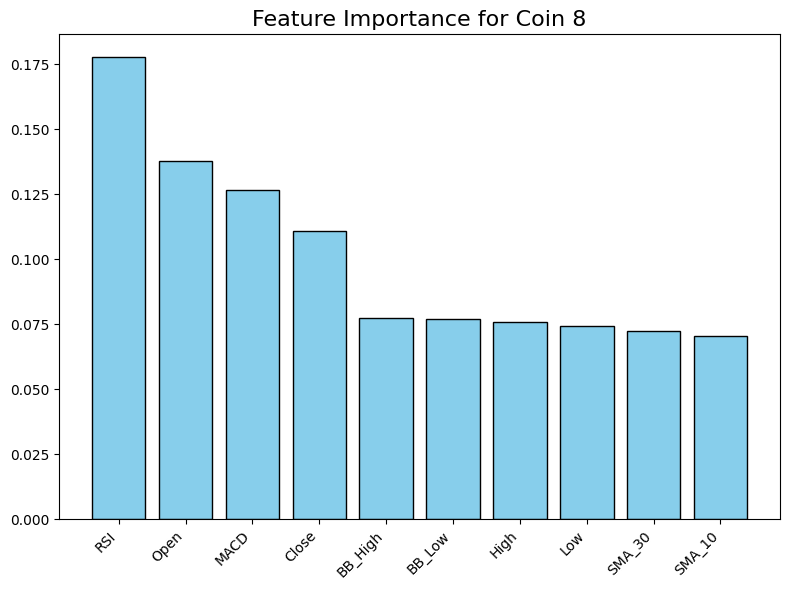


Training for Coin ID: 10
Train accuracy: 1.0000
Test accuracy: 0.9851


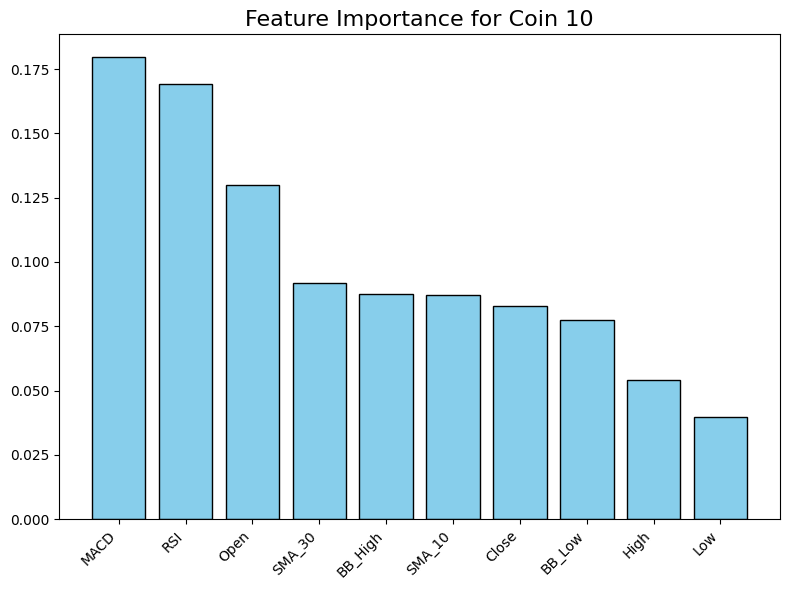


Training for Coin ID: 11
Train accuracy: 1.0000
Test accuracy: 0.9991


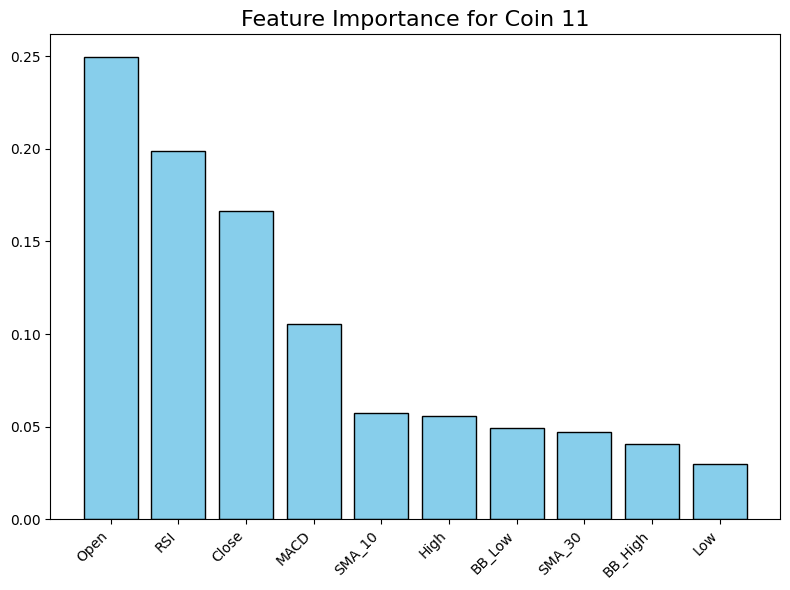


Training for Coin ID: 7
Train accuracy: 1.0000
Test accuracy: 0.5912


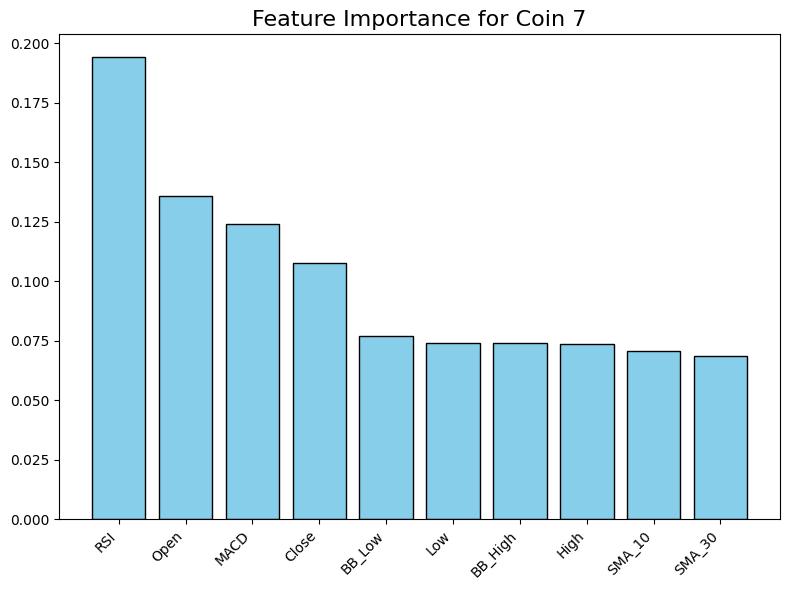


Training for Coin ID: 5
Train accuracy: 1.0000
Test accuracy: 0.5062


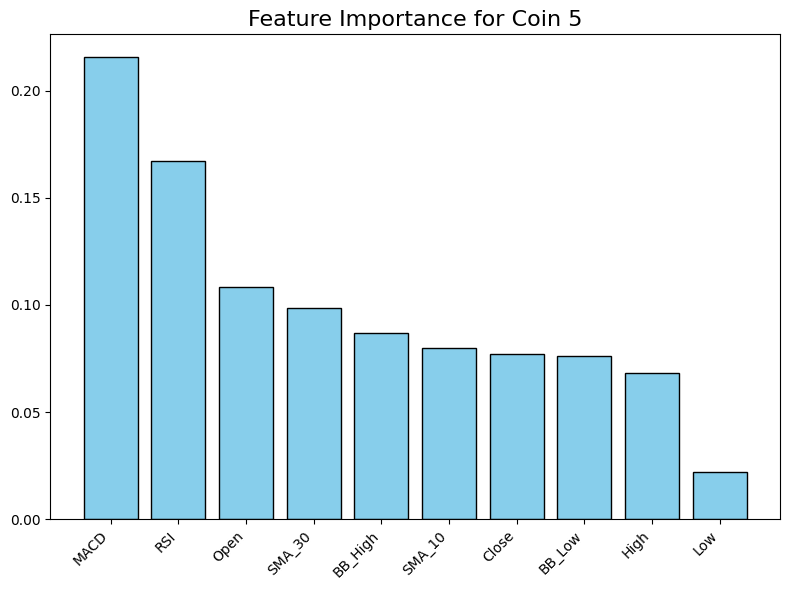


Training for Coin ID: 13
Train accuracy: 1.0000
Test accuracy: 1.0000


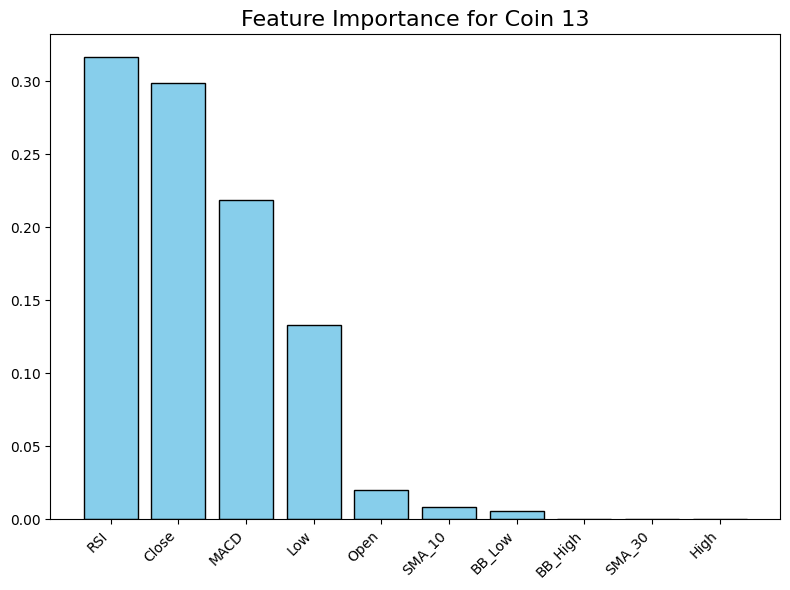


Training for Coin ID: 4
Train accuracy: 1.0000
Test accuracy: 0.6104


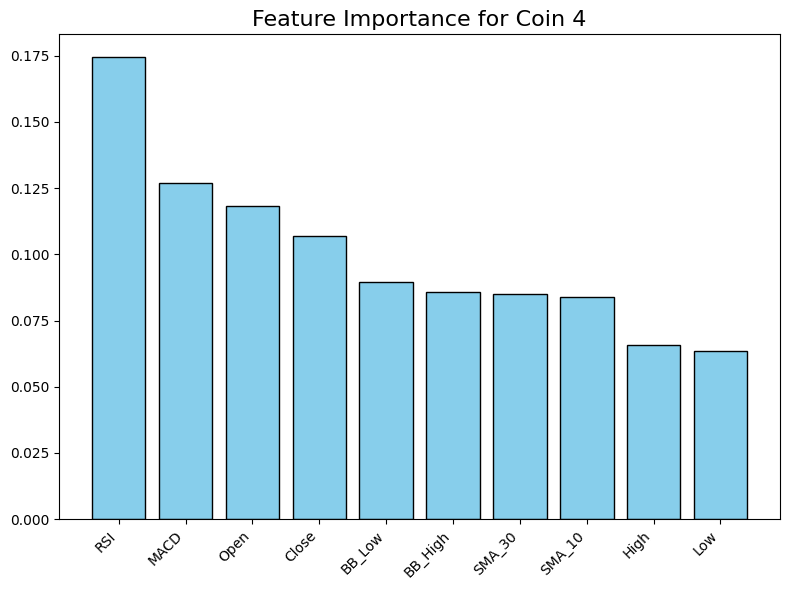


Training for Coin ID: 9
Train accuracy: 1.0000
Test accuracy: 0.6855


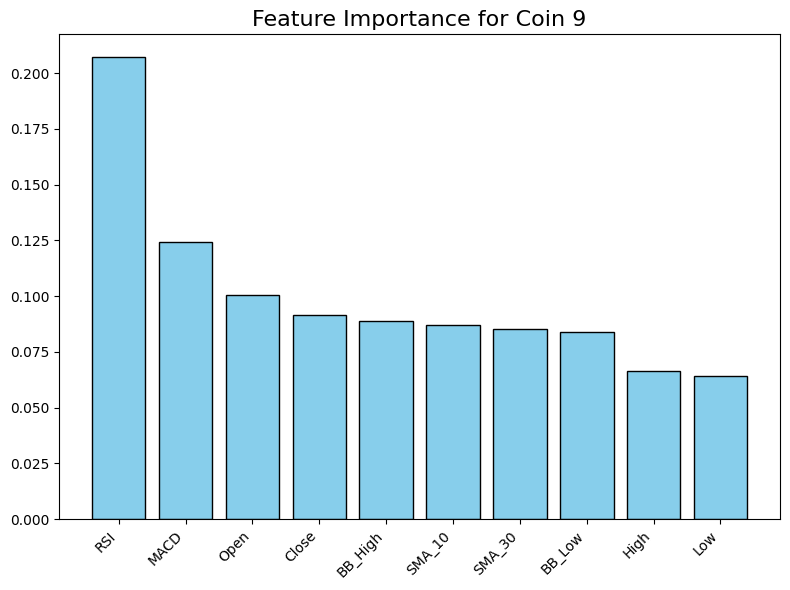


Training for Coin ID: 12
Train accuracy: 1.0000
Test accuracy: 0.6101


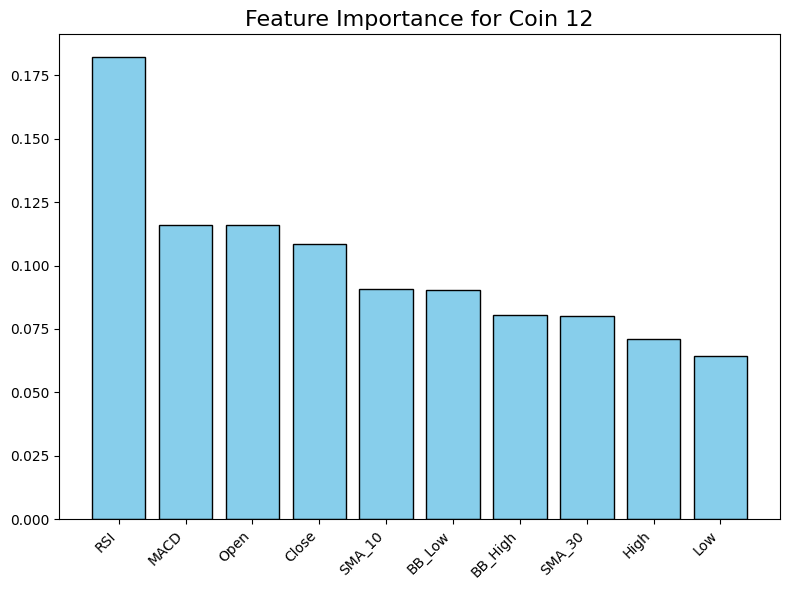


Training for Coin ID: 1
Train accuracy: 1.0000
Test accuracy: 0.6667


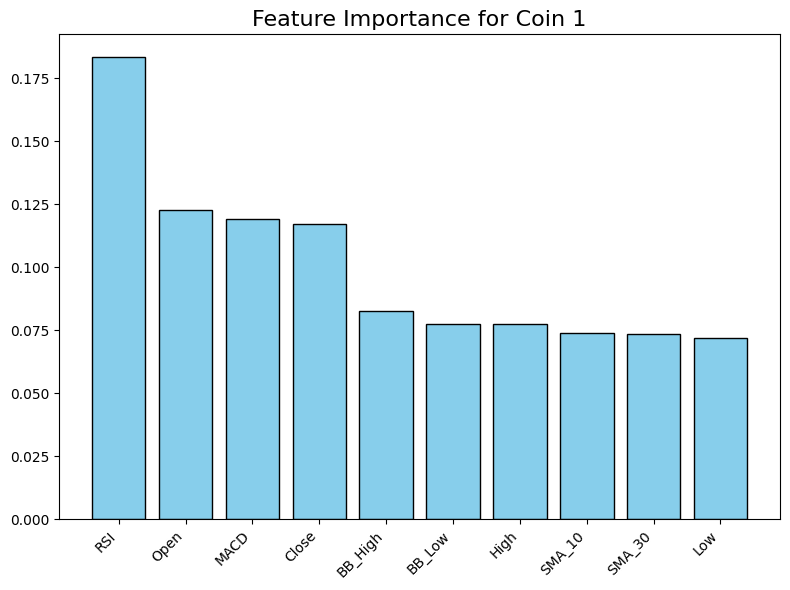

In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Find unique coins
coin_ids = abnormal_df['ID'].unique()

# For saving results
results = {}

for coin_id in coin_ids:
    print(f"\nTraining for Coin ID: {coin_id}")

    # Filter abnormal_df for this coin
    coin_df = abnormal_df[abnormal_df['ID'] == coin_id]

    if len(coin_df) < 50:
        print(f"Skipping coin {coin_id} due to too few samples.")
        continue

    features = ['Open', 'High', 'Low', 'Close', 'SMA_10', 'SMA_30', 'RSI', 'MACD', 'BB_High', 'BB_Low']
    X = coin_df[features]
    y = coin_df['Target']

    # Train-test split
    split_idx = int(0.7 * len(X))
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Train accuracy: {train_score:.4f}")
    print(f"Test accuracy: {test_score:.4f}")

    # Feature importances
    importances = model.feature_importances_

    # Save results
    results[coin_id] = {
        'model': model,
        'train_score': train_score,
        'test_score': test_score,
        'importances': importances
    }

    feature_names = X.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.title(f"Feature Importance for Coin {coin_id}", fontsize=16)
    plt.bar(range(len(importances)), importances[indices], color="skyblue", edgecolor="k")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
